In [2]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [3]:
library(patchwork)

Warning message:
"package 'patchwork' was built under R version 3.6.3"

We start by creating 3 plots

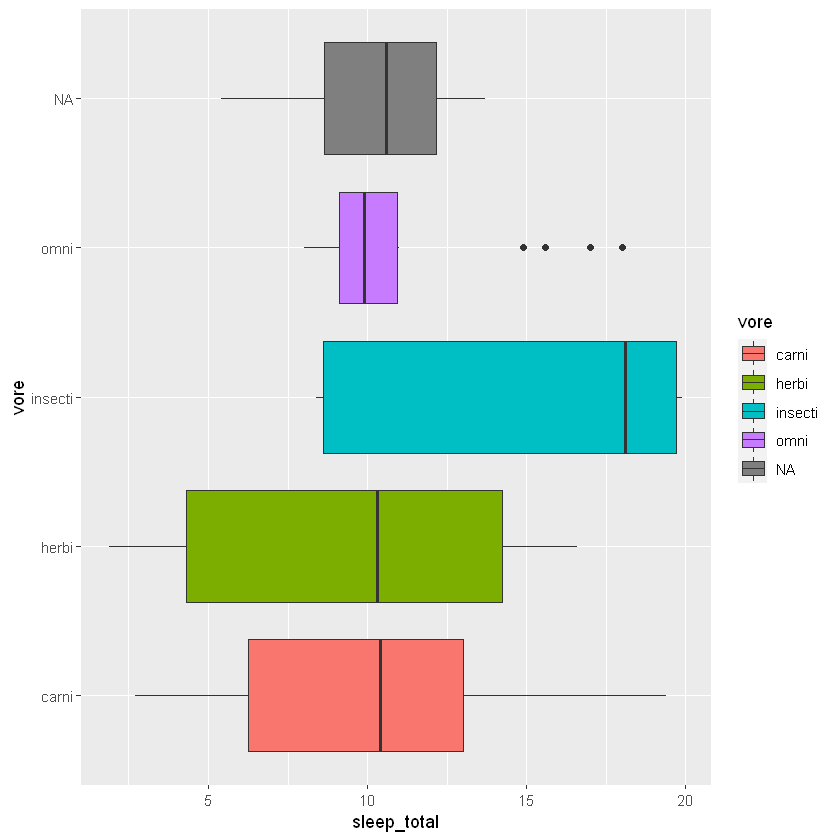

In [4]:
p1 <- ggplot(msleep) + 
  geom_boxplot(aes(x = sleep_total, y = vore, fill = vore))
p1

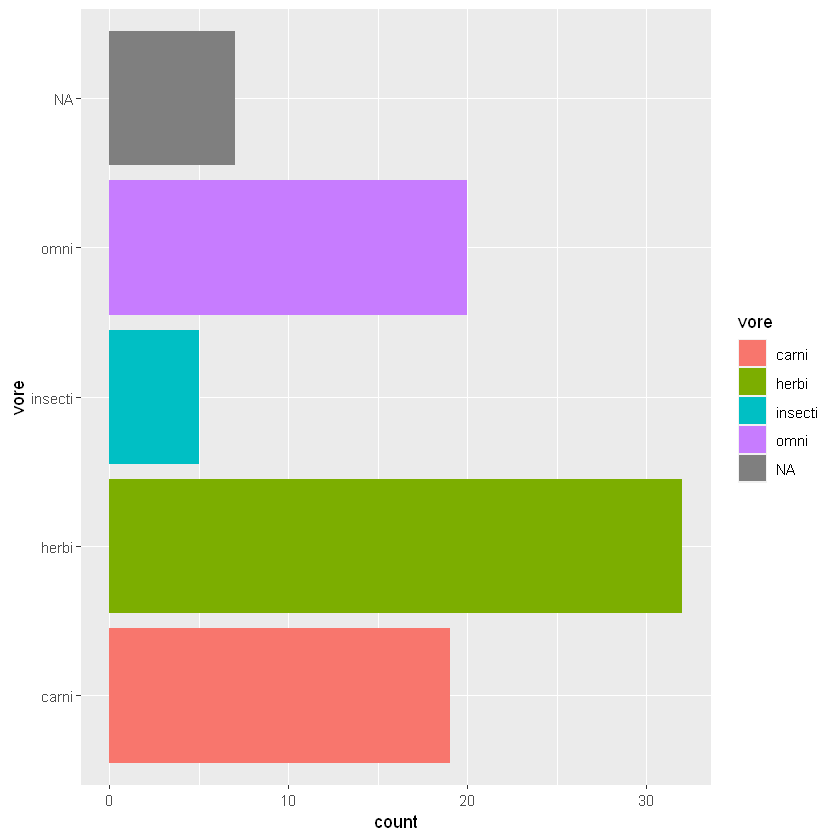

In [7]:
p2 <- ggplot(msleep) + 
  geom_bar(aes(y = vore, fill = vore))
p2

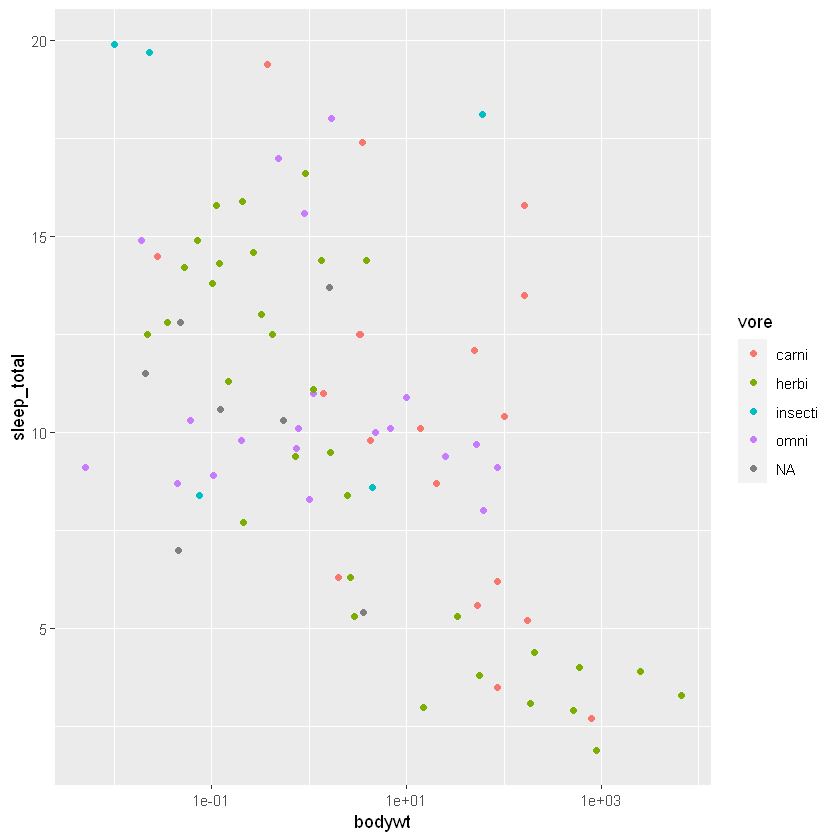

In [8]:
p3 <- ggplot(msleep) + 
  geom_point(aes(x = bodywt, y = sleep_total, colour = vore)) + 
  scale_x_log10()
p3

Using **patchwork operator** to create multi-plots

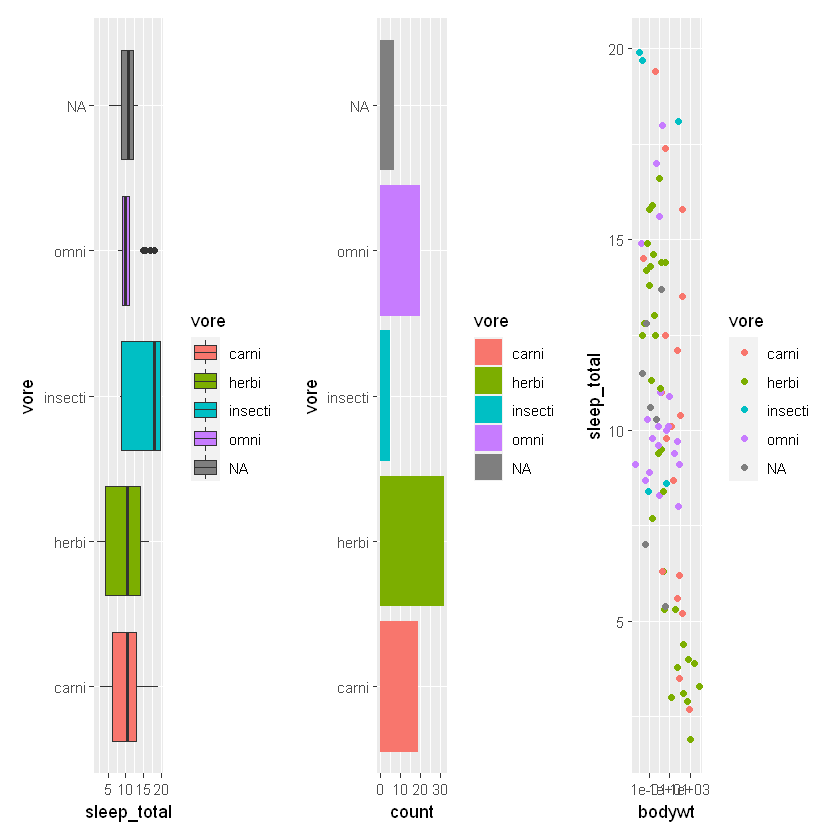

In [10]:
p1 + p2 + p3

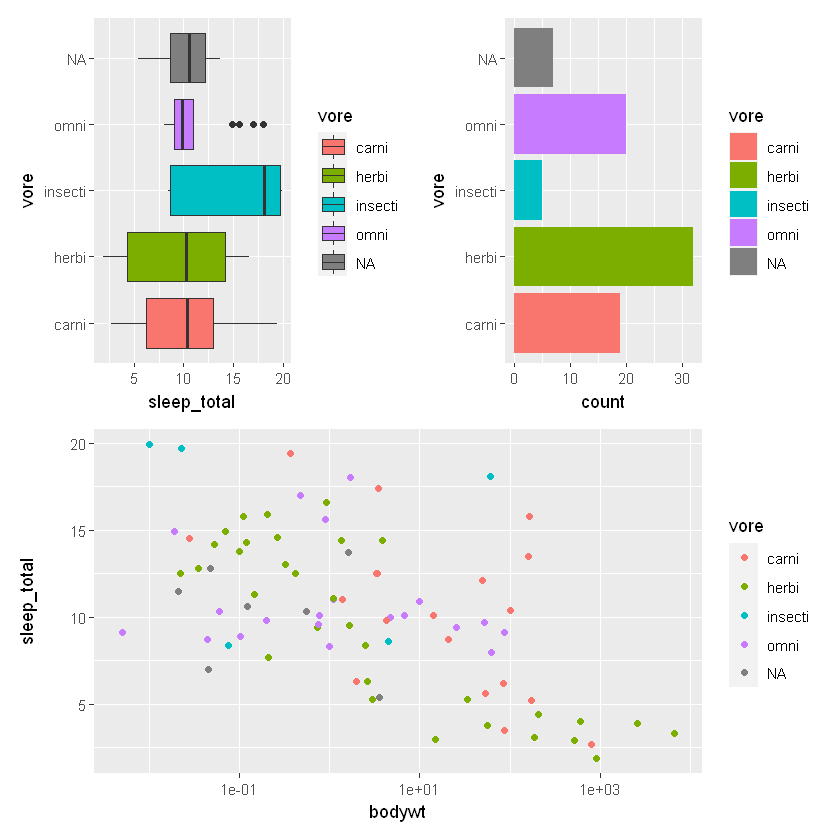

In [11]:
(p1 | p2) / 
   p3

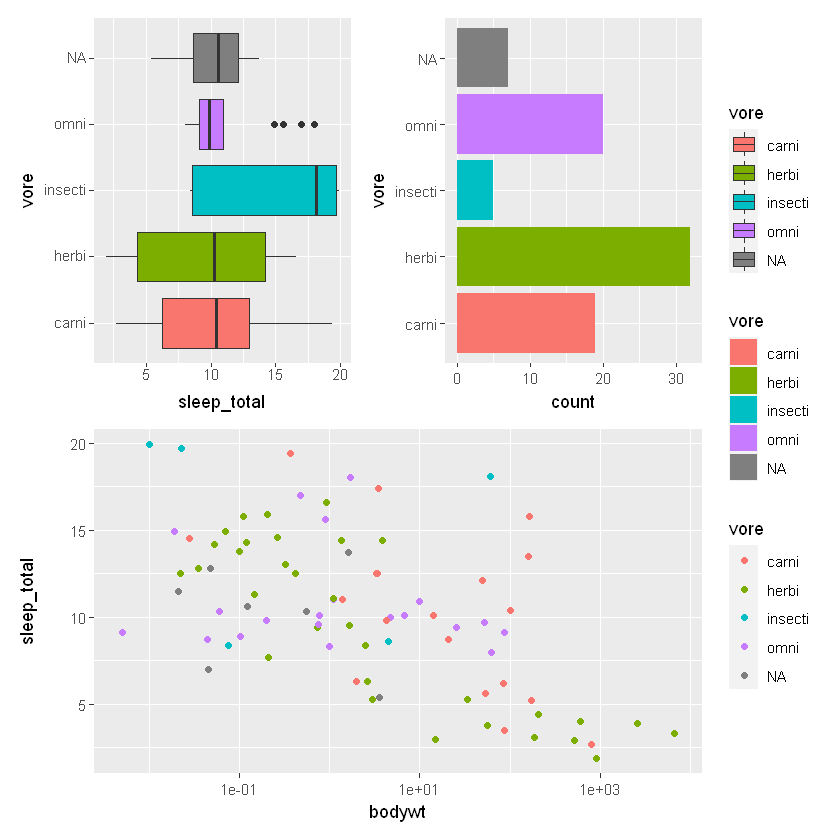

In [12]:
p_all <- (p1 | p2) / 
            p3
p_all + plot_layout(guides = 'collect')

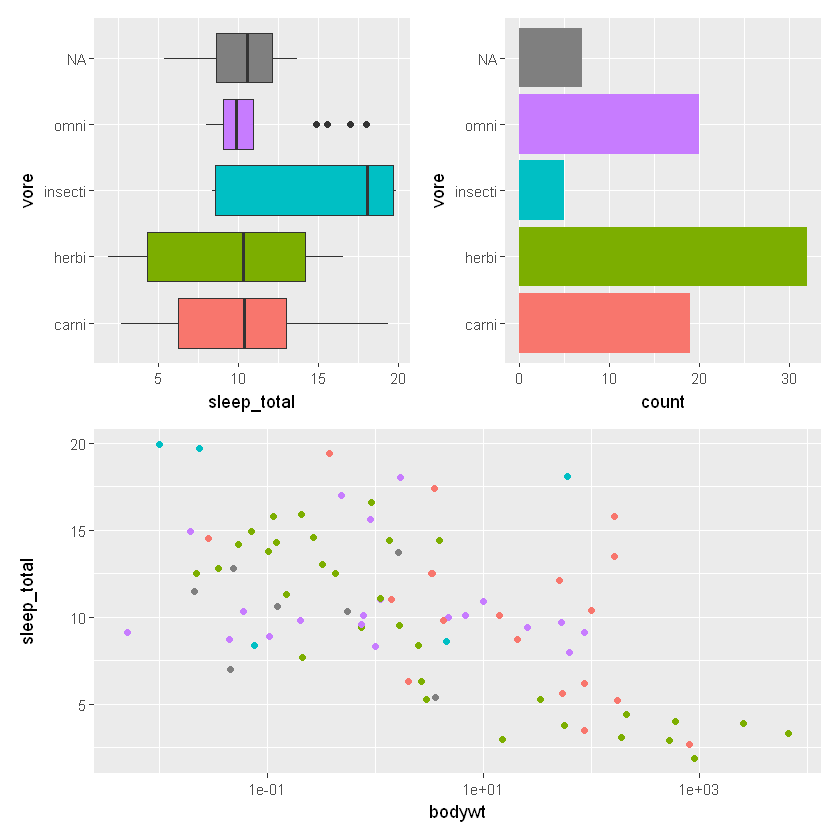

In [13]:
p_all & theme(legend.position = 'none')

In [14]:
p_all <- p_all & theme(legend.position = 'none')

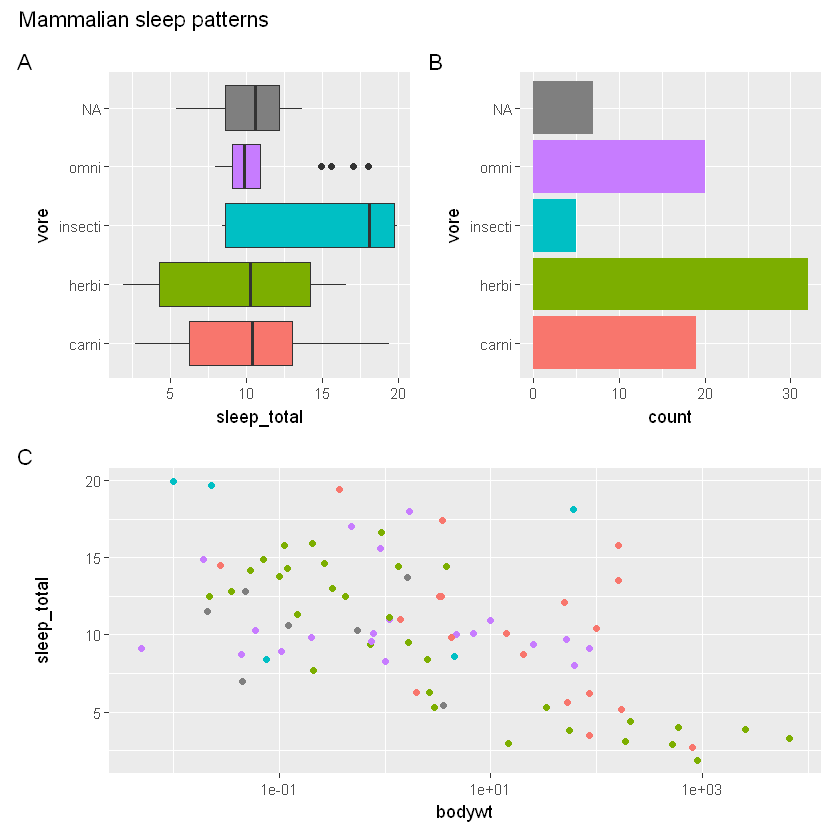

In [15]:
p_all + plot_annotation(
  title = 'Mammalian sleep patterns',
  tag_levels = 'A'
)

Patchwork will assign the same amount of space to each plot by default, but this
can be controlled with the `widths` and `heights` argument in `plot_layout()`. 
This can take a numeric vector giving their relative sizes (e.g. `c(2, 1)` will 
make the first plot twice as big as the second). Modify the code below so that
the middle plot takes up half of the total space:

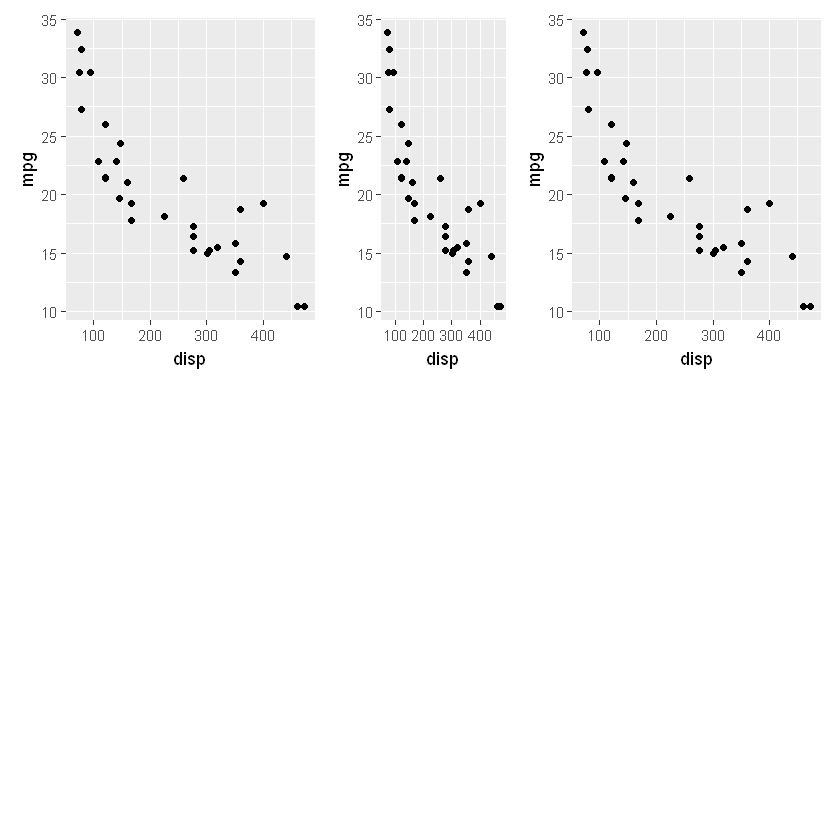

In [16]:
p <- ggplot(mtcars) + 
  geom_point(aes(x = disp, y = mpg))
p + p + p + plot_layout(heights = c(2, 1, 2), widths = c(2, 1, 2))

Patchwork contains many features for fine tuning the layout and annotation. Very
complex layouts can be obtained by providing a design specification to the 
`design` argument in `plot_layout()`. The design can be defined as a textual 
representation of the cells. Use the layout given below. How should the textual 
representation be undertood.

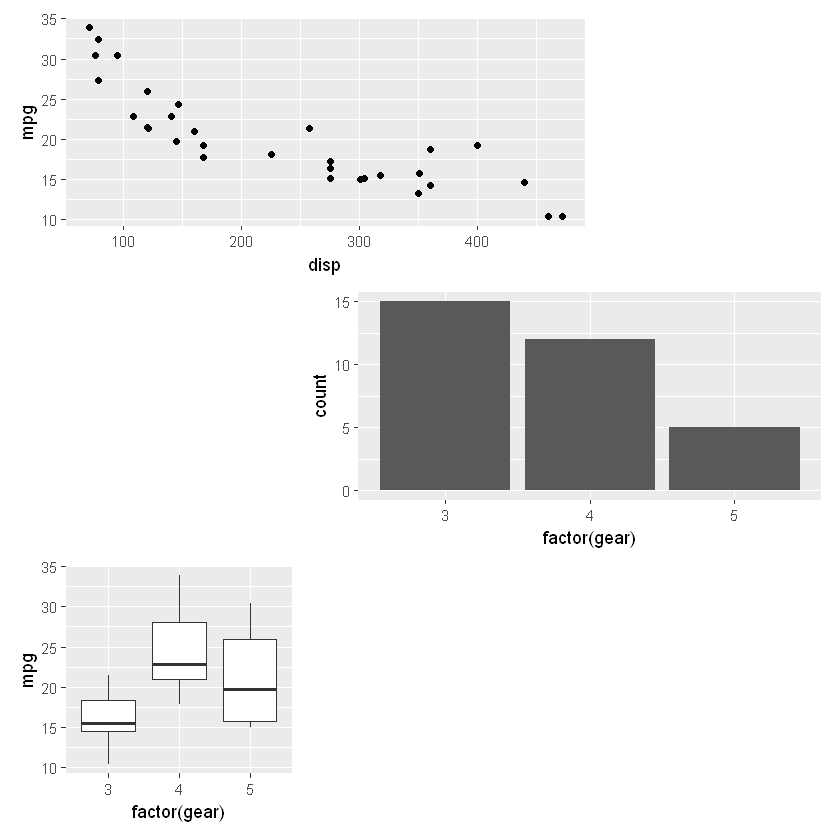

In [17]:
p1 <- ggplot(mtcars) + 
  geom_point(aes(x = disp, y = mpg))
p2 <- ggplot(mtcars) + 
  geom_bar(aes(x = factor(gear)))
p3 <- ggplot(mtcars) + 
  geom_boxplot(aes(x = factor(gear), y = mpg))
layout <- '
AA#
#BB
C##
'
p1 + p2 + p3 + plot_layout(design = layout)